In [121]:
#Prepare and process data
import math
import pandas as pd #read data file csv
import matplotlib.pyplot as plt #draw chart
import matplotlib.ticker as ticker #Format
import numpy as np #data processing
from keras.callbacks import ModelCheckpoint #keep good training
from tensorflow.keras.models import load_model #download model
from sklearn.preprocessing import MinMaxScaler #normalize data 0->1
#Training, model building
from keras.models import Sequential #input
from keras.layers import Dropout #avoid overfitting
from keras.layers import LSTM #dependent learning
from keras.layers import Dense #output
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

#Phân tích chỉ số
from sklearn.metrics import r2_score #measure suitability
from sklearn.metrics import mean_squared_error #measure MSE and RMSE = sqrt(MSE)
from sklearn. metrics import mean_absolute_error #measure mean absolute error
from sklearn.metrics import mean_absolute_percentage_error #measure the mean percent absolute error

In [122]:
df=pd.read_csv('../assets/weather_24.csv')
df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,preciptype,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
0,1/1/2010,33.1,22.1,26.6,34.1,22.1,27.4,20.9,74.2,0.0,...,NaN,20.2,109.6,1009.2,43.5,9.6,219.5,18.9,8,0.50
1,1/2/2010,32.0,22.0,27.1,34.9,22.0,28.7,21.0,70.7,0.0,...,NaN,14.0,112.0,1009.8,51.1,9.9,233.6,20.1,8,0.55
2,1/3/2010,32.2,24.0,27.2,36.8,24.0,28.7,21.9,73.7,0.0,...,NaN,16.6,132.2,1010.0,52.4,9.9,232.0,20.0,8,0.58
3,1/4/2010,32.0,23.0,27.2,33.5,23.0,27.9,20.0,66.5,0.0,...,NaN,16.6,106.9,1009.6,56.6,10.3,240.7,20.9,8,0.62
4,1/5/2010,33.0,23.1,27.1,36.1,23.1,28.3,21.8,74.5,0.0,...,NaN,16.6,117.9,1009.3,40.8,10.3,242.0,20.9,8,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5258,5/25/2024,36.2,29.6,32.4,44.9,39.5,42.0,26.6,73.3,1.0,...,rain,16.9,160.7,1007.9,46.1,10.3,275.9,23.7,10,0.56
5259,5/26/2024,35.0,26.0,30.5,45.1,26.0,38.2,26.4,79.8,1.1,...,rain,29.5,225.7,1008.8,56.4,9.6,283.3,24.5,9,0.59
5260,5/27/2024,37.0,29.0,31.8,47.1,36.7,41.2,27.0,78.0,2.5,...,rain,22.3,228.4,1007.1,50.1,9.9,204.2,17.6,9,0.63
5261,5/28/2024,32.0,29.0,29.9,44.1,36.7,39.8,27.9,89.3,1.3,...,rain,18.4,246.8,1007.3,74.3,9.1,218.9,18.8,8,0.67


In [123]:
df = df.drop('preciptype', axis=1)

In [124]:
df.info() # kiểm tra dữ liệu đã được định dạng

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5263 entries, 0 to 5262
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          5263 non-null   object 
 1   tempmax           5263 non-null   float64
 2   tempmin           5263 non-null   float64
 3   temp              5263 non-null   float64
 4   feelslikemax      5263 non-null   float64
 5   feelslikemin      5263 non-null   float64
 6   feelslike         5263 non-null   float64
 7   dew               5263 non-null   float64
 8   humidity          5263 non-null   float64
 9   precip            5263 non-null   float64
 10  precipprob        5263 non-null   int64  
 11  precipcover       5263 non-null   float64
 12  windspeed         5263 non-null   float64
 13  winddir           5263 non-null   float64
 14  sealevelpressure  5263 non-null   float64
 15  cloudcover        5263 non-null   float64
 16  visibility        5263 non-null   float64


In [125]:
#Định dạng lại cấu trúc của cột Date (định dạng năm-tháng-ngày)
df["datetime"]=pd.to_datetime(df.datetime,format="%m/%d/%Y")

In [126]:
df=pd.DataFrame(df,columns=['datetime','tempmax','tempmin','temp','feelslikemax','feelslikemin','feelslike','dew','humidity','precip','precipprob','precipcover','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex','moonphase'])
df.index=df.datetime
df.drop("datetime",axis=1, inplace=True)

In [127]:
df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
datetime,,,,,,,,,,,,,,,,,,,,
2010-01-01,33.1,22.1,26.6,34.1,22.1,27.4,20.9,74.2,0.0,0,0.00,20.2,109.6,1009.2,43.5,9.6,219.5,18.9,8,0.50
2010-01-02,32.0,22.0,27.1,34.9,22.0,28.7,21.0,70.7,0.0,0,0.00,14.0,112.0,1009.8,51.1,9.9,233.6,20.1,8,0.55
2010-01-03,32.2,24.0,27.2,36.8,24.0,28.7,21.9,73.7,0.0,0,0.00,16.6,132.2,1010.0,52.4,9.9,232.0,20.0,8,0.58
2010-01-04,32.0,23.0,27.2,33.5,23.0,27.9,20.0,66.5,0.0,0,0.00,16.6,106.9,1009.6,56.6,10.3,240.7,20.9,8,0.62
2010-01-05,33.0,23.1,27.1,36.1,23.1,28.3,21.8,74.5,0.0,0,0.00,16.6,117.9,1009.3,40.8,10.3,242.0,20.9,8,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-25,36.2,29.6,32.4,44.9,39.5,42.0,26.6,73.3,1.0,100,8.33,16.9,160.7,1007.9,46.1,10.3,275.9,23.7,10,0.56
2024-05-26,35.0,26.0,30.5,45.1,26.0,38.2,26.4,79.8,1.1,100,12.50,29.5,225.7,1008.8,56.4,9.6,283.3,24.5,9,0.59
2024-05-27,37.0,29.0,31.8,47.1,36.7,41.2,27.0,78.0,2.5,100,33.33,22.3,228.4,1007.1,50.1,9.9,204.2,17.6,9,0.63


<Axes: xlabel='datetime'>

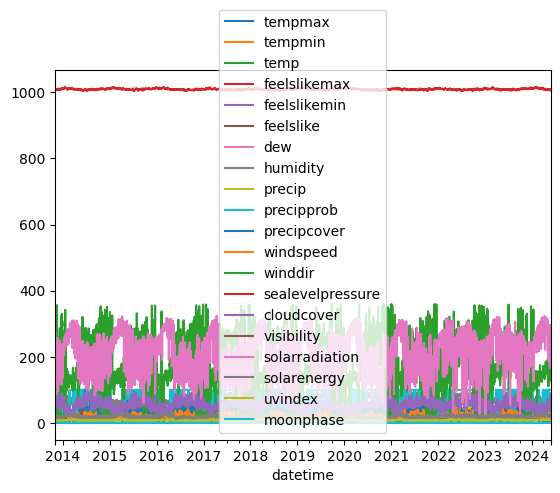

In [128]:
df_for_plot=df.tail(3865)
df_for_plot.plot.line()# df_for_plot=df_for_training.tail(5000)

## **Devided Data**

In [129]:
data=df.values
training_data_len = math.ceil(len(data)* 0.8)
train_data = data[0: training_data_len, :]
train_data.shape
test_data=data[training_data_len:]
test_data.shape

(1052, 20)

In [130]:
train_data

array([[33.1 , 22.1 , 26.6 , ..., 18.9 ,  8.  ,  0.5 ],
       [32.  , 22.  , 27.1 , ..., 20.1 ,  8.  ,  0.55],
       [32.2 , 24.  , 27.2 , ..., 20.  ,  8.  ,  0.58],
       ...,
       [33.  , 26.  , 29.4 , ..., 21.2 ,  8.  ,  0.  ],
       [35.  , 27.  , 30.1 , ..., 20.1 ,  8.  ,  0.04],
       [35.  , 26.  , 29.5 , ..., 11.1 ,  4.  ,  0.08]])

In [131]:
# #Tiến hành chuẩn hoá lại dữ liệu với các giá trị được đưa về từ 0-1
sc=MinMaxScaler(feature_range=(0,1))
# #Chuẩn hoá dữ liệu có tên data
sc_train=sc.fit_transform(data)

In [132]:
sc

MinMaxScaler()

In [133]:
trainX = []
trainY = []

n_future = 7   # Number of days we want to look into the future based on the past days.
n_past = 90


In [134]:
# 8-2
for i in range(n_past, len(train_data) - n_future +1):
    trainX.append(sc_train[i - n_past:i, 0:train_data.shape[1]])
    trainY.append(sc_train[i + n_future - 1:i + n_future, 9])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (4115, 90, 20).
trainY shape == (4115, 1).


In [135]:
trainY.shape[0]

4115

In [136]:
from keras import regularizers
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=32, activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()


/home/blackcait/.miniconda3/envs/pytorch_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 90, 64)         │        21,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 90, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 90, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 90, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │           425 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,763 (147.51 KB)

 Trainable params: 37,763 (147.51 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
#huấn luyện mô hình mô hình
save_model="save_model.keras" #lưu lại mô hình với dạng file .h5
best_model=ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True, mode='auto') #tìm ra mô hình tốt nhất, save_best_only: lưu mô hình tốt nhất
model.fit(trainX, trainY, epochs=100,verbose=2,callbacks=best_model) #lưu dữ liệu phần epoch


Epoch 1/100



Epoch 1: loss improved from inf to 0.43216, saving model to save_model.keras
129/129 - 8s - 62ms/step - loss: 0.4322
Epoch 2/100

Epoch 2: loss improved from 0.43216 to 0.34843, saving model to save_model.keras
129/129 - 5s - 41ms/step - loss: 0.3484
Epoch 3/100

Epoch 3: loss improved from 0.34843 to 0.31538, saving model to save_model.keras
129/129 - 5s - 41ms/step - loss: 0.3154
Epoch 4/100

Epoch 4: loss improved from 0.31538 to 0.31445, saving model to save_model.keras
129/129 - 5s - 40ms/step - loss: 0.3144
Epoch 5/100

Epoch 5: loss improved from 0.31445 to 0.29414, saving model to save_model.keras
129/129 - 5s - 40ms/step - loss: 0.2941
Epoch 6/100

Epoch 6: loss improved from 0.29414 to 0.28527, saving model to save_model.keras
129/129 - 5s - 38ms/step - loss: 0.2853
Epoch 7/100

Epoch 7: loss improved from 0.28527 to 0.26776, saving model to save_model.keras
129/129 - 5s - 40ms/step - loss: 0.2678
Epoch 8/100

Epoch 8: loss did not improve from 0.26776
129/129 - 5s - 38ms/st

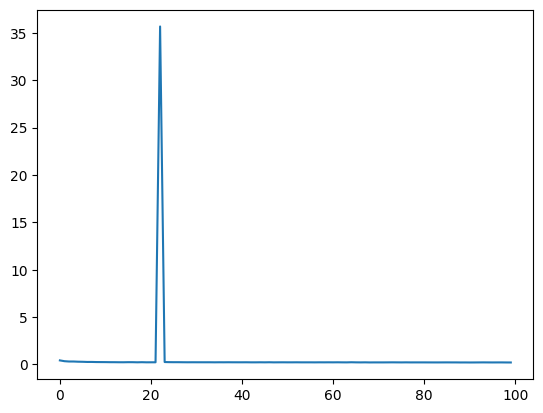

In [138]:
loss_per_epoch = model.history.history['loss']
plt.plot(loss_per_epoch)

In [139]:
# 8-2
prediction_copies = np.repeat(trainY, train_data.shape[1], axis=-1)
y_train=sc.inverse_transform(prediction_copies)
final_model=load_model('save_model.keras')
y_train_predict=final_model.predict(trainX)
y_train_predict = np.repeat(y_train_predict, train_data.shape[1], axis=-1)
y_train_predict=sc.inverse_transform(y_train_predict) 

129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


In [140]:
y_train_predict.shape

(4115, 20)

In [141]:
# 8-2
test=df[len(train_data)-90:].values
test=test.reshape(-1,20)
sc_test=sc.transform(test)

x_test=[]
for i in range(n_past, len(test) - n_future +1):
    x_test.append(sc_test[i - n_past:i, 0:train_data.shape[1]])
x_test=np.array(x_test)

y_test=data[training_data_len:]
y_test_predict=final_model.predict(x_test)
y_test_predict = np.repeat(y_test_predict, train_data.shape[1], axis=-1)
y_test_predict=sc.inverse_transform(y_test_predict)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [208]:
x_test.shape

(1052, 90, 20)

In [143]:
train_datal.shape

(4115, 22)

In [144]:
test_datal.shape

(1046, 22)

In [145]:
train_datal=df[n_past:training_data_len-n_future+1]
test_datal=df[training_data_len+n_future-1:]

In [146]:
len(train_datal)

4115

In [147]:
len(y_train_predict)

4115

In [148]:
lst_train_predict = []
for i in range(len(y_train_predict)):
  lst_train_predict.append(y_train_predict[i][9])


In [149]:
lst_test_predict = []
for i in range(len(y_test_predict)):
  lst_test_predict.append(y_test_predict[i][9])




In [150]:
test_datal['prediction'] = lst_test_predict

/tmp/ipykernel_35957/1532570863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_datal['prediction'] = lst_test_predict


In [151]:
train_datal['prediction']=lst_train_predict


/tmp/ipykernel_35957/426058194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_datal['prediction']=lst_train_predict


In [152]:
prediction_new = []
for i in train_datal['prediction']:
  if i > 50:
    prediction_new.append(100)
  elif i <= 50:
    prediction_new.append(0)
train_datal['prediction_new'] = prediction_new

/tmp/ipykernel_35957/2640514304.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_datal['prediction_new'] = prediction_new


In [153]:
prediction_new = []
for i in test_datal['prediction']:
  if i > 50:
    prediction_new.append(100)
  elif i <= 50:
    prediction_new.append(0)
test_datal['prediction_new'] = prediction_new

/tmp/ipykernel_35957/120039394.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_datal['prediction_new'] = prediction_new


In [154]:
train_datal

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,prediction,prediction_new
datetime,,,,,,,,,,,,,,,,,,,,,
2010-04-01,34.6,25.8,29.0,40.9,25.8,32.1,23.6,74.2,0.0,0,...,135.7,1010.1,34.7,10.4,222.4,19.2,8,0.57,12.280787,0
2010-04-02,34.2,26.0,29.2,42.0,26.0,32.7,23.9,74.1,0.0,0,...,136.4,1009.7,44.4,10.4,300.5,25.9,10,0.60,12.285561,0
2010-04-03,35.0,26.0,29.3,40.6,26.0,32.5,23.0,69.8,0.0,0,...,139.3,1010.2,46.1,10.3,313.8,27.1,10,0.63,12.291437,0
2010-04-04,36.0,26.0,30.0,40.8,26.0,33.2,22.8,67.1,0.0,0,...,138.6,1010.4,43.4,10.3,252.9,21.7,8,0.67,12.297350,0
2010-04-05,35.6,26.8,29.7,41.4,29.7,34.0,23.8,72.2,0.0,0,...,141.8,1009.2,44.8,10.3,280.6,24.2,9,0.70,12.305135,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,35.0,27.8,30.9,42.3,31.5,37.1,24.9,72.2,0.0,0,...,241.5,1008.6,49.1,10.3,198.6,17.2,7,0.75,98.523209,100
2021-07-03,36.0,27.0,30.6,43.8,31.2,37.1,25.4,75.7,1.5,100,...,255.5,1007.0,46.0,10.2,180.8,15.8,6,0.78,98.523781,100
2021-07-04,32.1,26.8,28.9,44.1,29.6,36.0,26.4,86.7,63.1,100,...,230.8,1006.4,50.8,10.1,113.4,9.8,4,0.81,98.526535,100


In [155]:
test_datal

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,prediction,prediction_new
datetime,,,,,,,,,,,,,,,,,,,,,
2021-07-19,32.9,22.2,26.4,39.2,22.2,27.9,23.5,85.6,0.1,100,...,277.5,1007.6,79.5,9.2,121.8,10.5,4,0.33,98.502716,100
2021-07-20,33.0,24.9,27.4,40.6,24.9,30.5,23.9,81.6,2.4,100,...,261.0,1008.7,54.2,10.0,288.6,24.7,9,0.36,98.500046,100
2021-07-21,31.0,25.9,27.7,39.0,25.9,31.0,24.8,85.0,5.0,100,...,250.4,1008.1,69.7,9.8,207.6,17.8,7,0.40,98.497002,100
2021-07-22,32.0,23.0,27.3,40.6,23.0,30.9,25.0,87.3,26.0,100,...,244.0,1007.7,68.5,9.6,181.1,15.5,6,0.43,98.495872,100
2021-07-23,30.0,23.2,27.1,38.8,23.2,31.0,25.9,93.2,11.0,100,...,248.2,1006.9,76.3,9.9,204.9,17.7,7,0.47,98.495773,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-25,36.2,29.6,32.4,44.9,39.5,42.0,26.6,73.3,1.0,100,...,160.7,1007.9,46.1,10.3,275.9,23.7,10,0.56,98.514603,100
2024-05-26,35.0,26.0,30.5,45.1,26.0,38.2,26.4,79.8,1.1,100,...,225.7,1008.8,56.4,9.6,283.3,24.5,9,0.59,98.519043,100
2024-05-27,37.0,29.0,31.8,47.1,36.7,41.2,27.0,78.0,2.5,100,...,228.4,1007.1,50.1,9.9,204.2,17.6,9,0.63,98.524010,100


In [156]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

/tmp/ipykernel_35957/3647254141.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(z, 'bo', markersize=10, color='red')  # 'bo' for blue dots, markersize sets the size of the dots


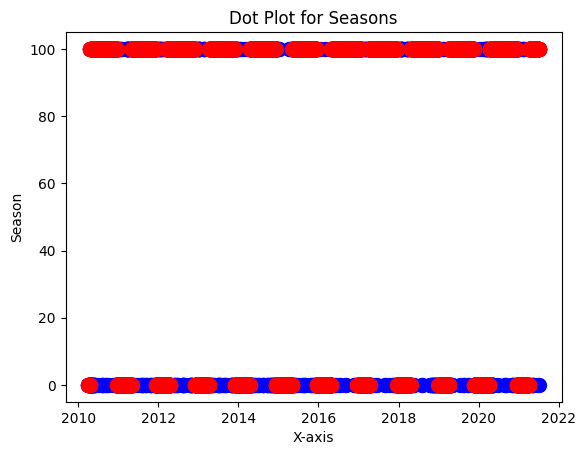

In [157]:
import matplotlib.pyplot as plt

# Data
x = train_datal['precipprob']
z = train_datal['prediction_new']
# seasons = train_datal['datetime']  # Labels for the y-axis

# Plot
plt.plot(x, 'bo', markersize=10)  # 'bo' for blue dots, markersize sets the size of the dots
# plt.plot(y, seasons, 'bo', markersize=10)  # 'bo' for blue dots, markersize sets the size of the dots
plt.plot(z, 'bo', markersize=10, color='red')  # 'bo' for blue dots, markersize sets the size of the dots

# Label axes
plt.xlabel('X-axis')
plt.ylabel('Season')

# Title
plt.title('Dot Plot for Seasons')

# Show plot
plt.show()


/tmp/ipykernel_35957/3141617591.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(z, 'bo', markersize=10, color='red')  # 'bo' for blue dots, markersize sets the size of the dots


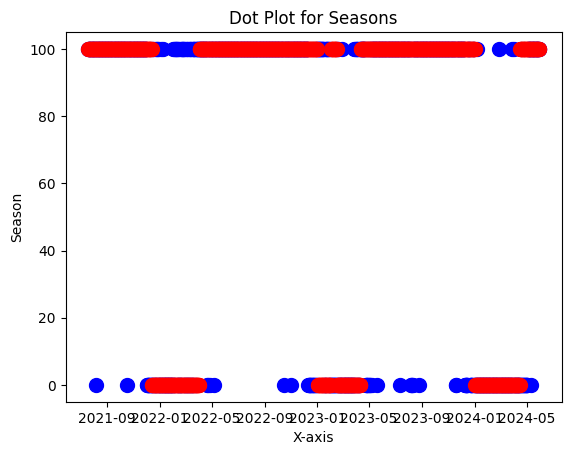

In [158]:
import matplotlib.pyplot as plt

# Data
x = test_datal['precipprob']
z = test_datal['prediction_new']
# seasons = train_datal['datetime']  # Labels for the y-axis

# Plot
plt.plot(x, 'bo', markersize=10)  # 'bo' for blue dots, markersize sets the size of the dots
# plt.plot(y, seasons, 'bo', markersize=10)  # 'bo' for blue dots, markersize sets the size of the dots
plt.plot(z, 'bo', markersize=10, color='red')  # 'bo' for blue dots, markersize sets the size of the dots

# Label axes
plt.xlabel('X-axis')
plt.ylabel('Season')

# Title
plt.title('Dot Plot for Seasons')

# Show plot
plt.show()


In [159]:
#8-2 train data
# print('R_square train: ', r2_score(train_datal['precipprob'],train_datal['prediction_new'])) #R-squared (R2)
print('MAE: ',mean_absolute_error(train_datal['precipprob'],train_datal['prediction_new'])) #Mean Absolute Error (MAE) đo độ lớn trung bình của các lỗi trong một tập hợp các dự đoán
# mape =  mean_absolute_percentage_error(train_datal['precipprob'],train_datal['prediction_new']) #MAPE (Mean absolute percentage error) là phần trăm sai số trung bình tuyệt đối
# print(f"MAPE: {mape * 100:.2f}%")
# print('MSE: ',mean_squared_error(train_datal['precipprob'],train_datal['prediction_new']))
print('RMSE: ',np.sqrt(mean_squared_error(train_datal['precipprob'],train_datal['prediction_new'])))

MAE:  15.965978128797083
RMSE:  39.957450029746745


In [160]:
# mape_t82 = mean_absolute_percentage_error(test_datal['precipprob'],test_datal['prediction_new'])
# print(f"MAPE: {mape_percentage:.2f}%")
print('MAE: ',mean_absolute_error(test_datal['precipprob'],test_datal['prediction_new'])) #Mean Absolute Error (MAE) đo độ lớn trung bình của các lỗi trong một tập hợp các dự đoán

print('RMSE: ',np.sqrt(mean_squared_error(test_datal['precipprob'],test_datal['prediction_new'])))

MAE:  16.921606118546844
RMSE:  41.13587985997971


### **PREDICT 7 DAYS**

In [193]:
sc=MinMaxScaler(feature_range=(0,1))
sc_test=sc.fit_transform(test_data)

In [197]:
sc_test.shape

(1052, 20)

In [195]:
x_input = sc_test[-90:,]


In [203]:
x_input.shape

(90, 20)

In [205]:
final_model=load_model('save_model.keras')

In [238]:

# Assuming `sc_test` is your test data and it's a NumPy array
last_n_days = sc_test[-n_past:]

# Reshape the data to match the input shape of your model
# Replace `-1` with the number of features in your data
x_input = last_n_days.reshape((1, n_past, -1))

# Predict the next day
yhat = final_model.predict(x_input)

# If you want to convert the prediction back to the original scale
# yhat = sc.inverse_transform(yhat)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [237]:
x_input.shape

(1, 90, 20)

In [226]:
x_test.shape

(1052, 90, 20)

In [229]:
y_test_predict.shape

(1052, 1)

In [223]:
1142-1046

96

In [224]:
train_data.shape[1]

20

In [225]:
yhat = final_model.predict(x_input)


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None